<a href="https://colab.research.google.com/github/HammedAiye/Computational_Drug_Design_Cancer/blob/main/Telomerase_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!bash ./Miniconda3-py312_24.3.0-0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -c conda-forge rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2024-05-07 11:26:28--  https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’

Miniconda3-py312_24 100%[===================>] 136.71M   108MB/s    in 1.3s    

2024-05-07 11:26:29 (108 MB/s) - ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please v

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [7]:
df.dropna(axis=0, inplace=True)
df.dropna(axis=1, inplace=True)

In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0
...,...,...,...
928,CHEMBL5288791,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...,3160.0
929,CHEMBL5287988,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...,21070.0
930,CHEMBL5280294,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...,820.0
931,CHEMBL5273293,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...,6320.0


In [9]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [10]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [11]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL314057,7300.0,O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCCCCC...
1,CHEMBL266842,100000.0,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...
2,CHEMBL314847,100000.0,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...
3,CHEMBL86984,9500.0,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...
4,CHEMBL87554,100000.0,N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H](Cc1c[nH]c...
...,...,...,...
928,CHEMBL5288791,3160.0,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...
929,CHEMBL5287988,21070.0,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...
930,CHEMBL5280294,820.0,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...
931,CHEMBL5273293,6320.0,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...


In [12]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [13]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [14]:
df_lipinski = lipinski(df.canonical_smiles)

In [15]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,682.198,8.3756,4.0,5.0
1,922.417,6.3511,8.0,9.0
2,594.045,6.1297,4.0,6.0
3,775.324,8.4613,4.0,7.0
4,822.300,4.7851,8.0,8.0
...,...,...,...,...
928,445.456,3.7531,1.0,8.0
929,490.453,3.6613,1.0,10.0
930,488.525,3.8191,1.0,9.0
931,505.508,3.7703,1.0,10.0


In [16]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [17]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,682.198,8.3756,4.0,5.0
1,922.417,6.3511,8.0,9.0
2,594.045,6.1297,4.0,6.0
3,775.324,8.4613,4.0,7.0
4,822.300,4.7851,8.0,8.0
...,...,...,...,...
928,445.456,3.7531,1.0,8.0
929,490.453,3.6613,1.0,10.0
930,488.525,3.8191,1.0,9.0
931,505.508,3.7703,1.0,10.0


In [18]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0
...,...,...,...
928,CHEMBL5288791,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...,3160.0
929,CHEMBL5287988,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...,21070.0
930,CHEMBL5280294,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...,820.0
931,CHEMBL5273293,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...,6320.0


In [19]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [20]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [21]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0,682.198,8.3756,4.0,5.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0,922.417,6.3511,8.0,9.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0,594.045,6.1297,4.0,6.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0,775.324,8.4613,4.0,7.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0,822.300,4.7851,8.0,8.0
...,...,...,...,...,...,...,...
928,CHEMBL5288791,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...,3160.0,445.456,3.7531,1.0,8.0
929,CHEMBL5287988,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...,21070.0,490.453,3.6613,1.0,10.0
930,CHEMBL5280294,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...,820.0,488.525,3.8191,1.0,9.0
931,CHEMBL5273293,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...,6320.0,505.508,3.7703,1.0,10.0


In [22]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [23]:
df_combined.standard_value.describe()

count    9.330000e+02
mean     5.679015e+05
std      1.143094e+07
min      6.400000e-01
25%      1.100000e+03
50%      5.000000e+03
75%      1.890000e+04
max      3.311311e+08
Name: standard_value, dtype: float64

In [24]:
-np.log10( (10**-9)* 100000000 )

1.0

In [25]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [26]:
def norm_value(input):
    norm = input['standard_value'] / input['standard_value'].max()

    input['standard_value_norm'] = norm
    x = input.drop(['standard_value'], axis=1)  # Provide column names as a list and specify the axis

    return x

In [27]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,682.198,8.3756,4.0,5.0,0.000022
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,922.417,6.3511,8.0,9.0,0.000302
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,594.045,6.1297,4.0,6.0,0.000302
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,775.324,8.4613,4.0,7.0,0.000029
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,822.300,4.7851,8.0,8.0,0.000302
...,...,...,...,...,...,...,...
928,CHEMBL5288791,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...,445.456,3.7531,1.0,8.0,0.000010
929,CHEMBL5287988,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...,490.453,3.6613,1.0,10.0,0.000064
930,CHEMBL5280294,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...,488.525,3.8191,1.0,9.0,0.000002
931,CHEMBL5273293,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...,505.508,3.7703,1.0,10.0,0.000019


In [28]:
df_norm.standard_value_norm.describe()

count    9.330000e+02
mean     1.715035e-03
std      3.452087e-02
min      1.932769e-09
25%      3.321947e-06
50%      1.509976e-05
75%      5.707709e-05
max      1.000000e+00
Name: standard_value_norm, dtype: float64

In [29]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Updated this line

    return x

# Now call the function
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,682.198,8.3756,4.0,5.0,13.656677
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,922.417,6.3511,8.0,9.0,12.520000
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,594.045,6.1297,4.0,6.0,12.520000
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,775.324,8.4613,4.0,7.0,13.542276
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,822.300,4.7851,8.0,8.0,12.520000
...,...,...,...,...,...,...,...
928,CHEMBL5288791,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...,445.456,3.7531,1.0,8.0,14.020313
929,CHEMBL5287988,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...,490.453,3.6613,1.0,10.0,13.196335
930,CHEMBL5280294,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...,488.525,3.8191,1.0,9.0,14.606186
931,CHEMBL5273293,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...,505.508,3.7703,1.0,10.0,13.719283


In [30]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,682.198,8.3756,4.0,5.0,13.656677
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,922.417,6.3511,8.0,9.0,12.520000
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,594.045,6.1297,4.0,6.0,12.520000
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,775.324,8.4613,4.0,7.0,13.542276
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,822.300,4.7851,8.0,8.0,12.520000
...,...,...,...,...,...,...,...
928,CHEMBL5288791,Nc1nc(-c2cccc(OS(=O)(=O)c3ccccc3)c2)nc2c1c(=O)...,445.456,3.7531,1.0,8.0,14.020313
929,CHEMBL5287988,Nc1nc(-c2cccc(OS(=O)(=O)c3ccc([N+](=O)[O-])cc3...,490.453,3.6613,1.0,10.0,13.196335
930,CHEMBL5280294,CN(C)c1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5...,488.525,3.8191,1.0,9.0,14.606186
931,CHEMBL5273293,COc1ccc(S(=O)(=O)Oc2cccc(-c3nc(N)c4c(=O)oc5ccc...,505.508,3.7703,1.0,10.0,13.719283


In [31]:
df_final.pIC50.describe()

count    933.000000
mean      13.907210
std        0.978723
min        9.000000
25%       13.243538
50%       13.821030
75%       14.478607
max       17.713820
Name: pIC50, dtype: float64

In [48]:
df_final.to_csv('bioactivity_data_pIC50.csv')

In [50]:
# Check the column names of df_final
print(df_final.columns)

Index(['molecule_chembl_id', 'canonical_smiles', 'MW', 'LogP', 'NumHDonors',
       'NumHAcceptors', 'pIC50'],
      dtype='object')


In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

In [ ]:
df_2class.to_csv('bioactivity_data_2class_pIC50.csv')

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

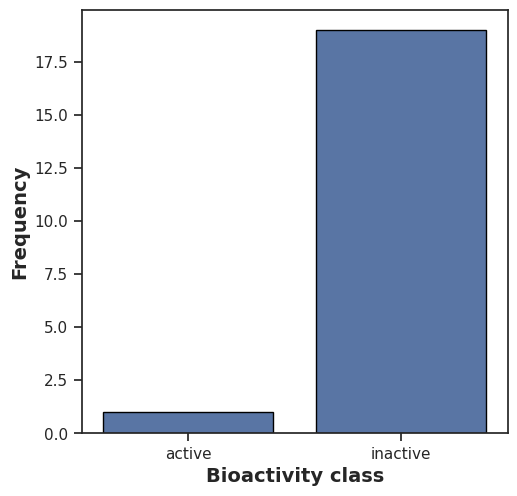

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

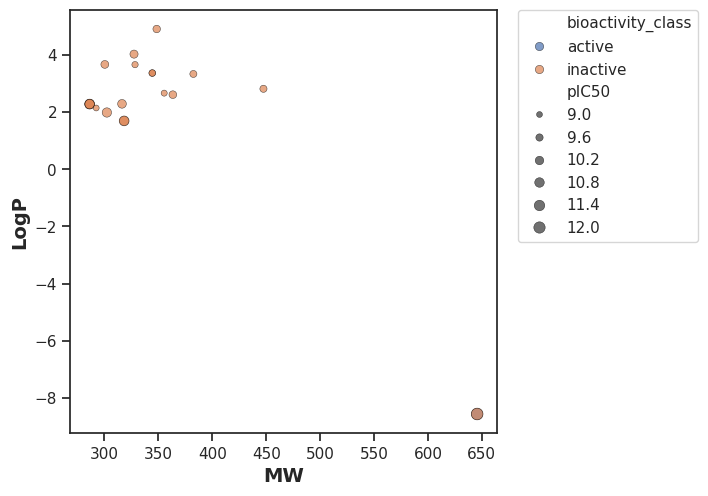

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

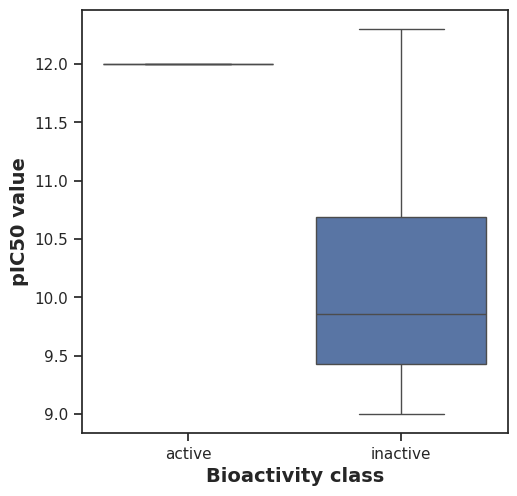

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,18.0,0.2,0.05,Same distribution (fail to reject H0)


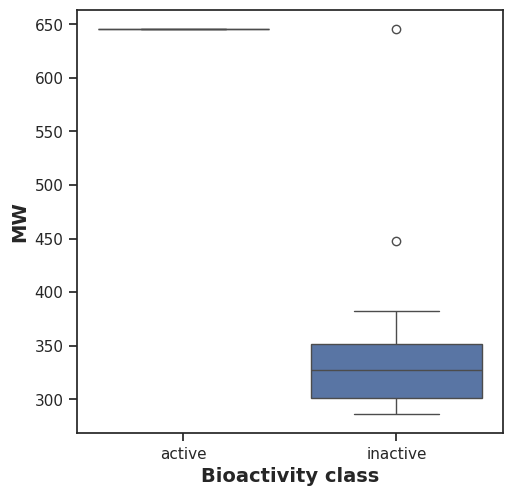

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:

mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,18.5,0.139712,0.05,Same distribution (fail to reject H0)


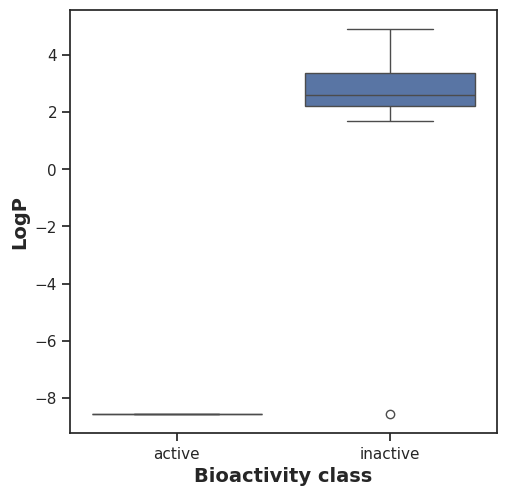

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,0.5,0.14016,0.05,Same distribution (fail to reject H0)


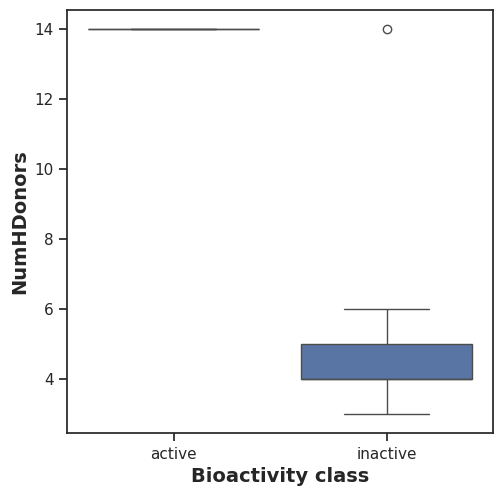

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,18.5,0.119762,0.05,Same distribution (fail to reject H0)


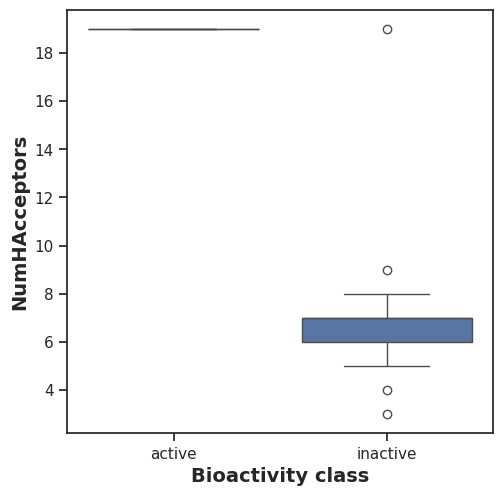

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,18.5,0.129599,0.05,Same distribution (fail to reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 39%)
  adding: bioactivity_data_preprocessed.csv (deflated 72%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 27%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: bioactivity_data_pIC50.csv (deflated 66%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: bioactivity_data_2class_pIC50.csv (deflated 66%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 37%)
